In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
#lets load the dataset
data = pd.read_csv("C:\\Users\\Akash Sahay\\OneDrive\\Desktop\\Machine_Learning_Course\\ML Day11 7\\Social_Network_Ads.csv")

In [4]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0
...,...,...,...,...,...
395,10220446,Female,20,141231,1
396,12387292,Male,50,75848,1
397,10715173,Female,25,82560,1
398,10016842,Male,55,147667,0


In [11]:
#the userId plays no role in determining if the purchase was made or not. So lets drop it!

data

,Gender,Age,EstimatedSalary,Purchased
0,Male,42,121315,0
1,Male,53,67214,0
2,Female,59,111005,0
3,Female,39,53414,0
4,Male,39,114285,0
...,...,...,...,...
395,Female,20,141231,1
396,Male,50,75848,1
397,Female,25,82560,1
398,Male,55,147667,0


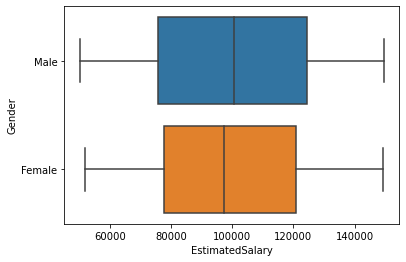

In [17]:
sns.boxplot(x='EstimatedSalary', y='Gender', data=data)


In [44]:
x= data.iloc [:,2:3].values
print (x) 


[[121315]
 [ 67214]
 [111005]
 [ 53414]
 [114285]
 [107458]
 [ 85582]
 [148335]
 [ 80579]
 [114204]
 [ 87786]
 [113544]
 [ 88300]
 [147066]
 [139622]
 [134716]
 [116333]
 [ 72567]
 [123254]
 [113548]
 [ 79343]
 [106149]
 [ 59674]
 [ 76333]
 [118742]
 [105897]
 [114815]
 [ 85428]
 [114005]
 [133402]
 [106726]
 [ 84550]
 [ 96296]
 [ 68964]
 [ 90946]
 [ 51787]
 [ 53940]
 [138928]
 [116474]
 [ 97284]
 [132951]
 [119308]
 [120675]
 [113547]
 [102686]
 [140262]
 [ 54075]
 [ 63715]
 [ 56058]
 [ 65052]
 [ 72107]
 [108656]
 [120639]
 [ 68033]
 [ 80283]
 [ 60952]
 [123137]
 [ 98529]
 [121301]
 [ 61144]
 [107405]
 [ 87032]
 [118544]
 [ 63743]
 [ 53404]
 [ 88672]
 [ 96164]
 [123288]
 [122623]
 [ 78696]
 [142525]
 [ 87656]
 [142587]
 [136561]
 [146860]
 [142362]
 [ 69596]
 [ 68131]
 [110448]
 [ 83386]
 [108578]
 [141388]
 [149365]
 [ 58313]
 [102619]
 [ 55147]
 [ 50075]
 [107704]
 [114836]
 [121827]
 [ 81442]
 [107339]
 [112221]
 [ 95625]
 [122153]
 [ 95670]
 [143045]
 [137848]
 [ 52183]
 [ 79634]


In [45]:
y = data.iloc[:,3].values
print (y)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [46]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
print (x)


[[ 0.76103154]
 [-1.14804259]
 [ 0.39722026]
 [-1.63500628]
 [ 0.51296235]
 [ 0.27205647]
 [-0.49988685]
 [ 1.71449234]
 [-0.67642883]
 [ 0.51010409]
 [-0.42211381]
 [ 0.48681452]
 [-0.40397617]
 [ 1.66971285]
 [ 1.40703476]
 [ 1.23391563]
 [ 0.58523059]
 [-0.95915007]
 [ 0.82945347]
 [ 0.48695567]
 [-0.72004384]
 [ 0.2258655 ]
 [-1.41410826]
 [-0.82625839]
 [ 0.67023751]
 [ 0.21697311]
 [ 0.53166458]
 [-0.50532108]
 [ 0.50308193]
 [ 1.18754822]
 [ 0.24622622]
 [-0.53630326]
 [-0.12181953]
 [-1.08628994]
 [-0.31060618]
 [-1.6924186 ]
 [-1.6164452 ]
 [ 1.38254542]
 [ 0.59020609]
 [-0.08695575]
 [ 1.17163368]
 [ 0.69021008]
 [ 0.73844772]
 [ 0.48692038]
 [ 0.10366584]
 [ 1.42961858]
 [-1.61168143]
 [-1.27151258]
 [-1.54170686]
 [-1.22433356]
 [-0.9753822 ]
 [ 0.31433057]
 [ 0.73717738]
 [-1.11914235]
 [-0.68687385]
 [-1.36901118]
 [ 0.82532486]
 [-0.04302315]
 [ 0.76053752]
 [-1.36223604]
 [ 0.27018625]
 [-0.44872037]
 [ 0.66325064]
 [-1.27052454]
 [-1.63535915]
 [-0.39084932]
 [-0.12647

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [48]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)


LogisticRegression()

In [49]:
y_pred= logmodel.predict(x_test)

In [50]:
df_ypred = pd.DataFrame(y_pred,columns = ['Y Pred'])
result = pd.concat ([data,df_ypred],axis = 1 )
result

,Gender,Age,EstimatedSalary,Purchased,Y Pred
0,Male,42,121315,0,0.0
1,Male,53,67214,0,0.0
2,Female,59,111005,0,0.0
3,Female,39,53414,0,0.0
4,Male,39,114285,0,0.0
...,...,...,...,...,...
395,Female,20,141231,1,NaN
396,Male,50,75848,1,NaN
397,Female,25,82560,1,NaN
398,Male,55,147667,0,NaN


In [51]:
cm = confusion_matrix (y_test,y_pred)
print (cm)


[[50  0]
 [30  0]]


In [54]:
#accuracy = (50+0)/80 = 0.625
result.head(50)

,Gender,Age,EstimatedSalary,Purchased,Y Pred
0,Male,42,121315,0,0.0
1,Male,53,67214,0,0.0
2,Female,59,111005,0,0.0
3,Female,39,53414,0,0.0
4,Male,39,114285,0,0.0
5,Male,39,107458,0,0.0
6,Female,20,85582,0,0.0
7,Female,59,148335,1,0.0
8,Male,48,80579,0,0.0
9,Female,42,114204,0,0.0
